<a href="https://colab.research.google.com/github/hayahussain16/final-project/blob/main/appointment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_excel('/content/medicalappointmentnoshows.xlsx')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃšBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
df.shape
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.columns=[col.strip().replace('-','_') for col in df.columns]

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [ ]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [ ]:
df['WaitingDays']=(df['AppointmentDay']-df['ScheduledDay']).dt.days


In [ ]:
df=df[df['WaitingDays']>=0]



In [ ]:
df['AppointmentWeekDay']=df['AppointmentDay'].dt.day_of_week
print(df['AppointmentWeekDay'])

5         4
6         4
7         4
9         4
10        4
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: AppointmentWeekDay, Length: 71959, dtype: int32


<ipython-input-31-2a6a5724aa7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AppointmentWeekDay']=df['AppointmentDay'].dt.day_of_week


In [ ]:
def age_group(age):
  if age<13:
    return 'child'
  elif 13<= age<25:
    return 'teen/youngadult'
  elif 25<=age<60:
    return 'adult'
  else:
    return 'senior'

df['AgeGroup']=df['Age'].apply(age_group)
print(df['AgeGroup'])

5                  senior
6         teen/youngadult
7                   adult
9         teen/youngadult
10                  adult
               ...       
110522              adult
110523              adult
110524    teen/youngadult
110525              adult
110526              adult
Name: AgeGroup, Length: 71959, dtype: object


<ipython-input-34-cd1552be0f5d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup']=df['Age'].apply(age_group)


In [ ]:
df['No_show']=df['No_show'].map({'Yes':1,'No':0})
print(df['No_show'])

5         0
6         1
7         1
9         0
10        0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 71959, dtype: int64


<ipython-input-35-21a5fe921adb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_show']=df['No_show'].map({'Yes':1,'No':0})


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   PatientId           71959 non-null  float64            
 1   AppointmentID       71959 non-null  int64              
 2   Gender              71959 non-null  object             
 3   ScheduledDay        71959 non-null  datetime64[ns, UTC]
 4   AppointmentDay      71959 non-null  datetime64[ns, UTC]
 5   Age                 71959 non-null  int64              
 6   Neighbourhood       71959 non-null  object             
 7   Scholarship         71959 non-null  int64              
 8   Hipertension        71959 non-null  int64              
 9   Diabetes            71959 non-null  int64              
 10  Alcoholism          71959 non-null  int64              
 11  Handcap             71959 non-null  int64              
 12  SMS_received        71959 non-null  

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['No_show','AppointmentDay','ScheduledDay'],axis=1)
y=df['No_show']
X=pd.get_dummies(x,drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      1.00      0.83     10301
           1       0.46      0.01      0.02      4091

    accuracy                           0.72     14392
   macro avg       0.59      0.50      0.42     14392
weighted avg       0.64      0.72      0.60     14392

[[10262    39]
 [ 4058    33]]


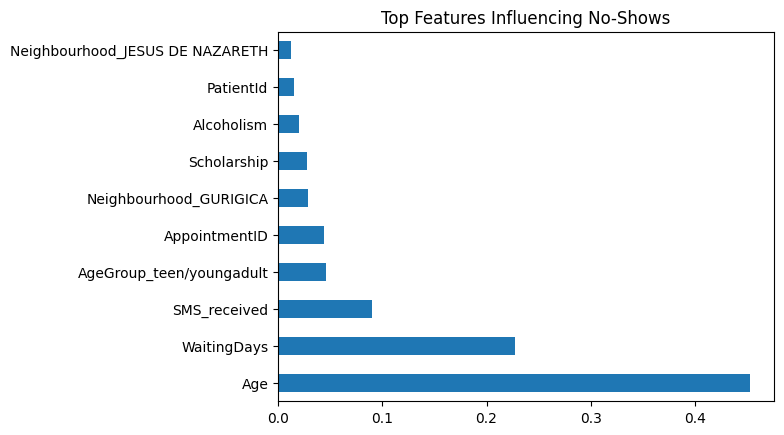

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title('Top Features Influencing No-Shows')
plt.show()


In [ ]:
df.to_csv('cleaned_appointments.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_appointments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>